<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-07-18 05:32:21--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  61.6MB/s    in 2.5s    

2025-07-18 05:32:23 (61.6 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



/tmp/ipykernel_586/3509914966.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_satisfaction = df.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median().fillna(0)


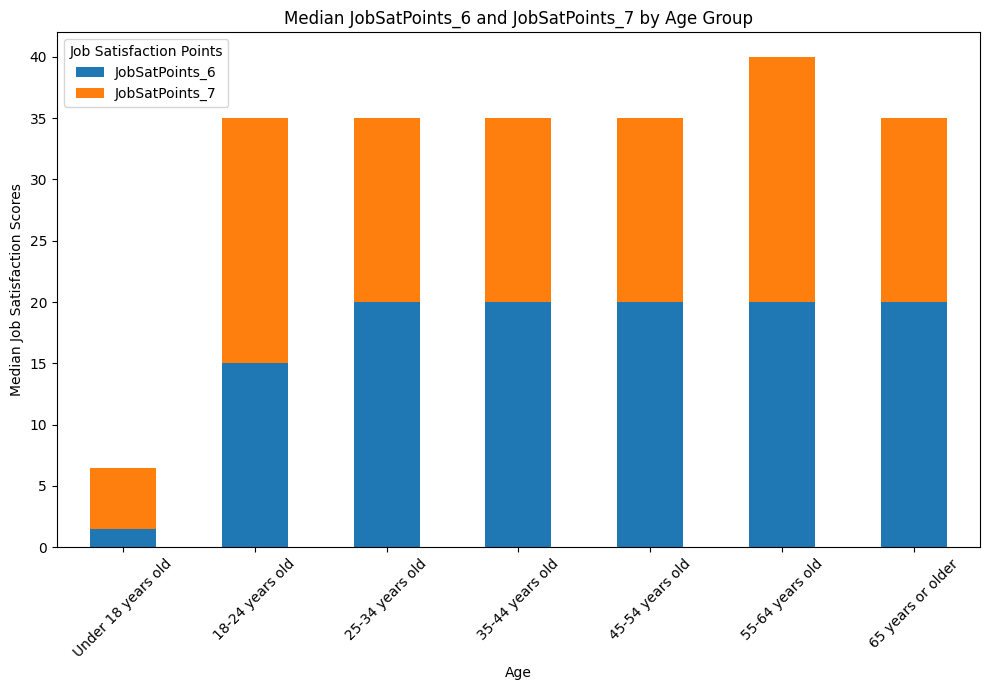

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Make sure Age is categorical with a logical order
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old', 
             '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older']

df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

# Group by Age and calculate median for JobSatPoints_6 and JobSatPoints_7
median_satisfaction = df.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median().fillna(0)

# Plot stacked bar chart
ax = median_satisfaction.plot(kind='bar', stacked=True, figsize=(10,7))

ax.set_ylabel('Median Job Satisfaction Scores')
ax.set_title('Median JobSatPoints_6 and JobSatPoints_7 by Age Group')
ax.legend(['JobSatPoints_6', 'JobSatPoints_7'], title='Job Satisfaction Points')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


/tmp/ipykernel_586/2400223142.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


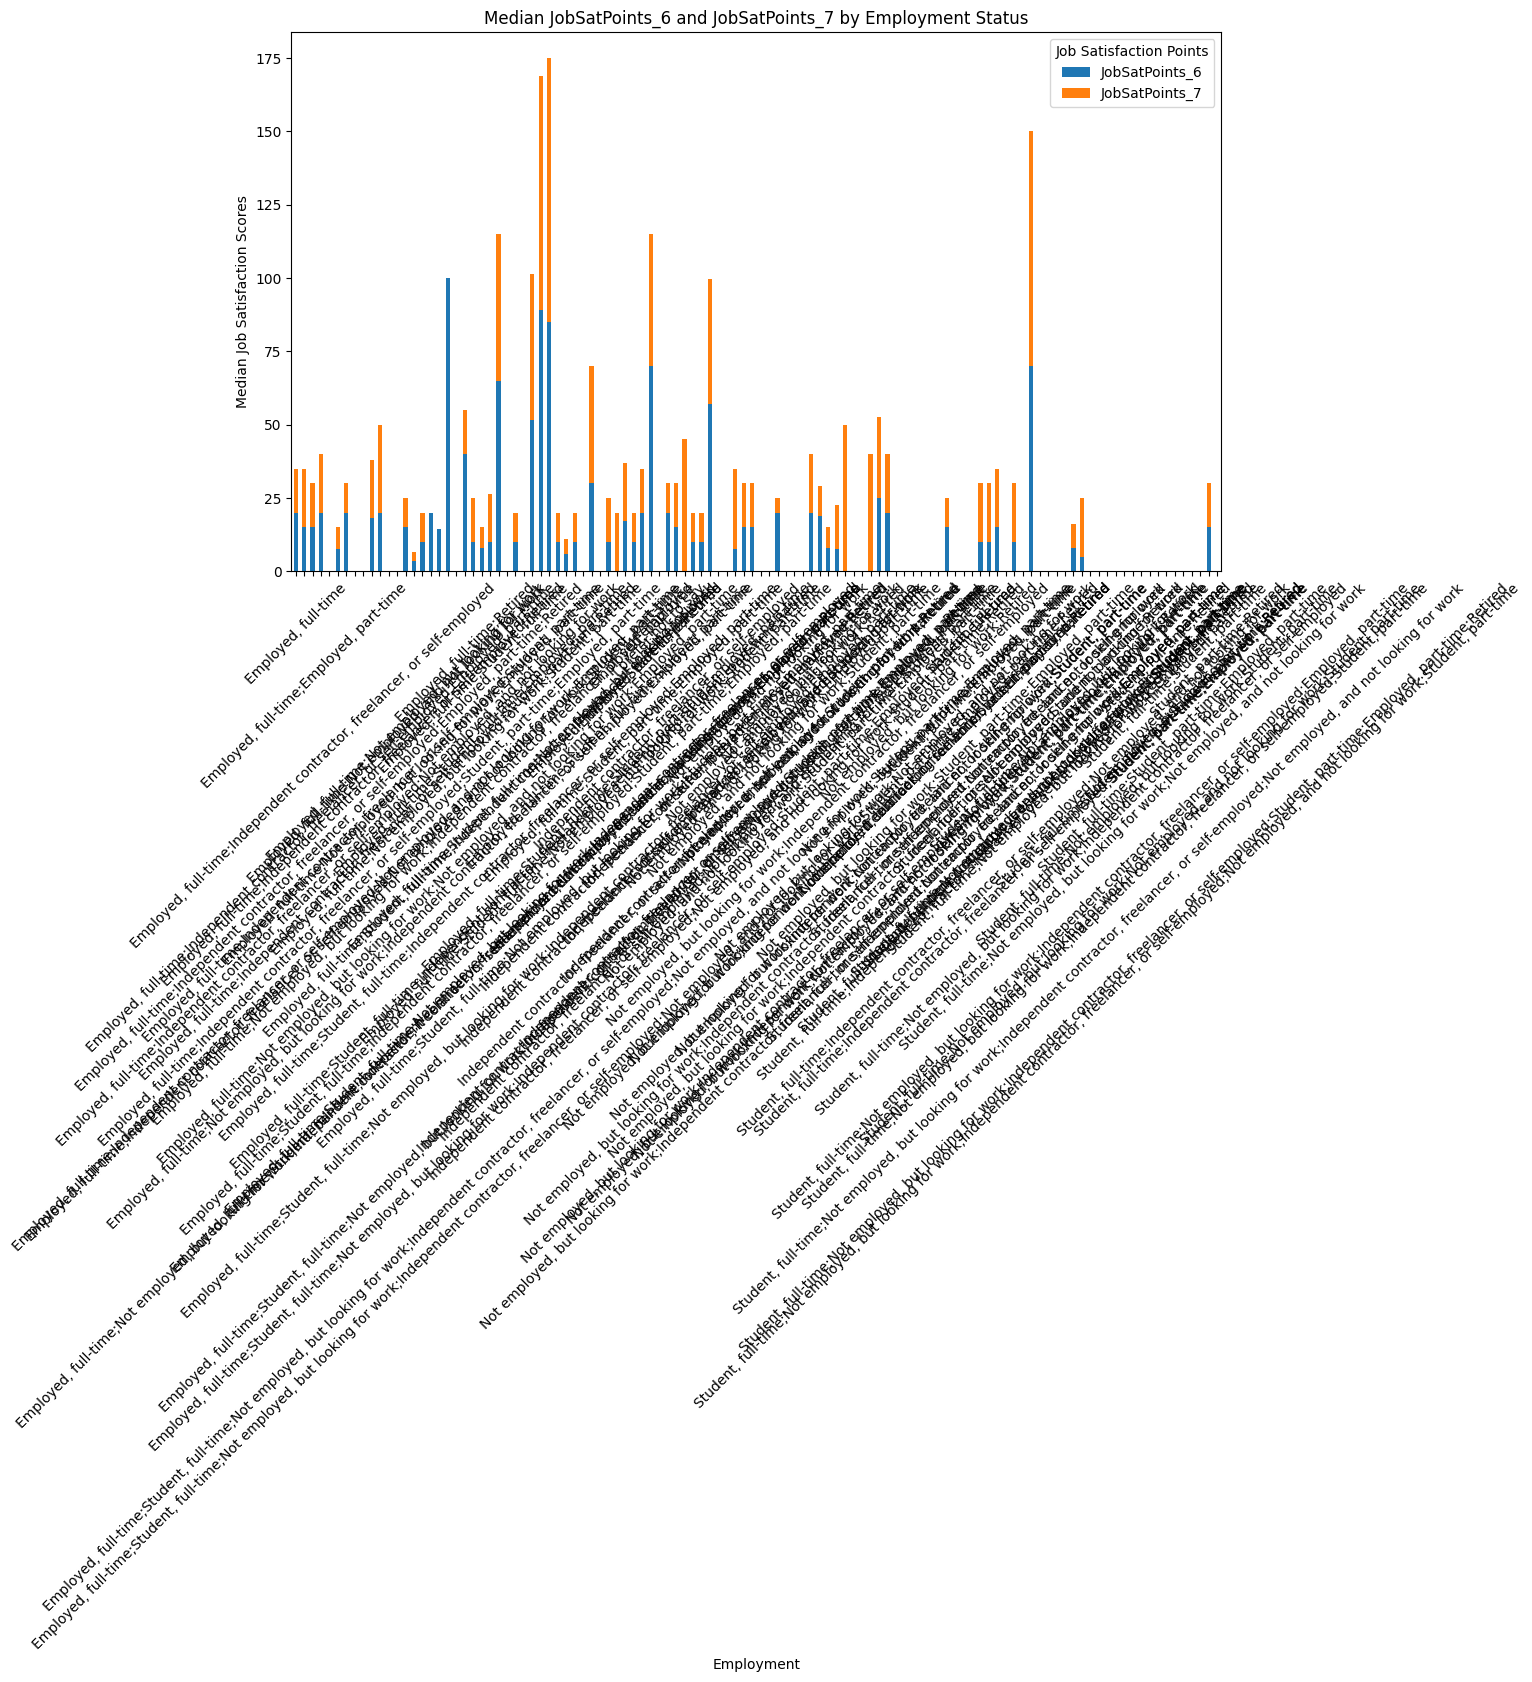

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by Employment and calculate median JobSatPoints_6 and JobSatPoints_7
median_satisfaction = df.groupby('Employment')[['JobSatPoints_6', 'JobSatPoints_7']].median().fillna(0)

# Plot stacked bar chart
ax = median_satisfaction.plot(kind='bar', stacked=True, figsize=(12,7))

# Add labels and title
ax.set_ylabel('Median Job Satisfaction Scores')
ax.set_title('Median JobSatPoints_6 and JobSatPoints_7 by Employment Status')
ax.legend(['JobSatPoints_6', 'JobSatPoints_7'], title='Job Satisfaction Points')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


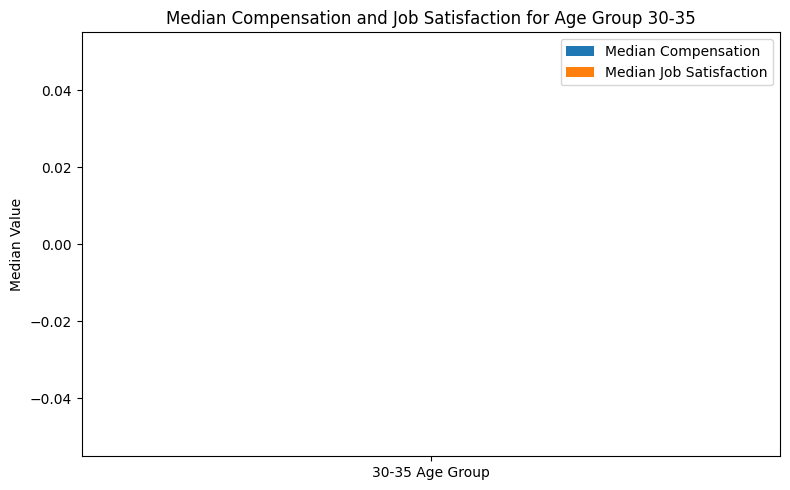

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Map Age to numeric values properly (if not done already)
age_map = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 65
}

# Create numeric column (force float type)
df['Age_numeric'] = df['Age'].map(age_map).astype(float)

# Now filter using numeric comparison
df_30_35 = df[(df['Age_numeric'] >= 30) & (df['Age_numeric'] <= 35)]

# Continue with your calculations...
median_comp = df_30_35['ConvertedCompYearly'].median()
median_jobsat = df_30_35['JobSatPoints_6'].median()

data = {
    'Median Compensation': median_comp,
    'Median Job Satisfaction': median_jobsat
}

plot_df = pd.DataFrame(data, index=['30-35 Age Group'])

ax = plot_df.plot(kind='bar', stacked=True, figsize=(8, 5), color=['#1f77b4', '#ff7f0e'])

plt.title('Median Compensation and Job Satisfaction for Age Group 30-35')
plt.ylabel('Median Value')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()



##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


/tmp/ipykernel_586/4164967630.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_df = df.groupby('Age').agg({


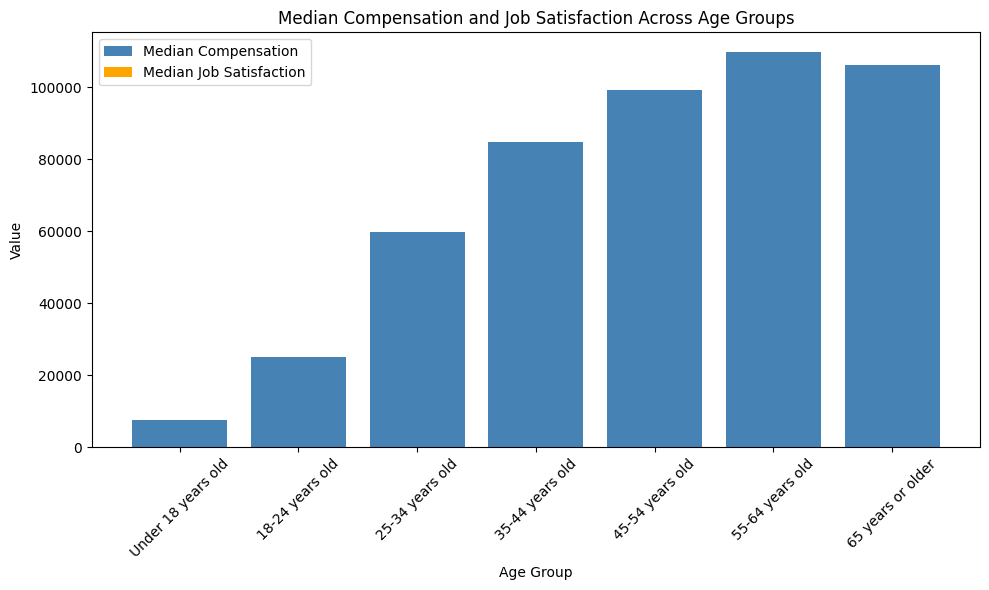

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your loaded dataframe

# Group by Age and calculate median of compensation and job satisfaction
median_df = df.groupby('Age').agg({
    'ConvertedCompYearly': 'median',
    'JobSatPoints_6': 'median'
}).reset_index()

# Fill NaN with 0 only for numeric columns
median_df['ConvertedCompYearly'] = median_df['ConvertedCompYearly'].fillna(0)
median_df['JobSatPoints_6'] = median_df['JobSatPoints_6'].fillna(0)

# Sort Age groups for better visualization order
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old', 
             '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older']

median_df['Age'] = pd.Categorical(median_df['Age'], categories=age_order, ordered=True)
median_df = median_df.sort_values('Age')

# Plot stacked bar chart
plt.figure(figsize=(10,6))

# Bars for median compensation
plt.bar(median_df['Age'], median_df['ConvertedCompYearly'], label='Median Compensation', color='steelblue')

# Bars for median job satisfaction stacked on top
plt.bar(median_df['Age'], median_df['JobSatPoints_6'], bottom=median_df['ConvertedCompYearly'], label='Median Job Satisfaction', color='orange')

plt.xlabel('Age Group')
plt.ylabel('Value')
plt.title('Median Compensation and Job Satisfaction Across Age Groups')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


/tmp/ipykernel_586/3072979404.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['DatabaseWantToWorkWith'] = df_filtered['DatabaseWantToWorkWith'].str.split(';')
/tmp/ipykernel_586/3072979404.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df_exploded.groupby(['Age', 'DatabaseWantToWorkWith']).size().reset_index(name='Count')


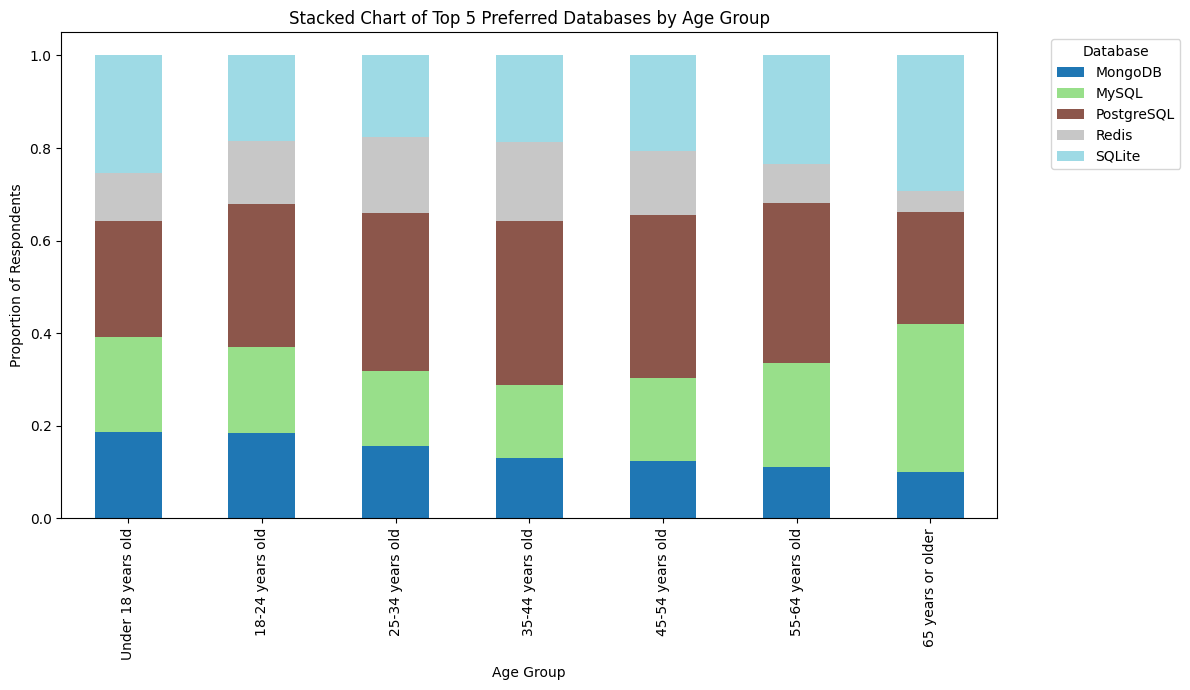

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Filter rows where DatabaseWantToWorkWith and Age are not missing
df_filtered = df.dropna(subset=['DatabaseWantToWorkWith', 'Age'])

# Step 2: Split DatabaseWantToWorkWith by ';' and explode to get one database per row
df_filtered['DatabaseWantToWorkWith'] = df_filtered['DatabaseWantToWorkWith'].str.split(';')
df_exploded = df_filtered.explode('DatabaseWantToWorkWith')

# Step 3: Clean whitespace
df_exploded['DatabaseWantToWorkWith'] = df_exploded['DatabaseWantToWorkWith'].str.strip()

# Step 4: Calculate counts by Age group and database
counts = df_exploded.groupby(['Age', 'DatabaseWantToWorkWith']).size().reset_index(name='Count')

# Step 5: Find top 5 databases overall
top_dbs = counts.groupby('DatabaseWantToWorkWith')['Count'].sum().nlargest(5).index

# Step 6: Filter counts for only top 5 databases
counts_top = counts[counts['DatabaseWantToWorkWith'].isin(top_dbs)]

# Step 7: Pivot data for stacked bar chart: rows=Age, columns=Database, values=Count
pivot_df = counts_top.pivot(index='Age', columns='DatabaseWantToWorkWith', values='Count').fillna(0)

# Optional: Sort Age groups in logical order
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old', 
             '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older']
pivot_df = pivot_df.reindex(age_order)

# Step 8: Normalize counts by row to get proportions for stacked bars
pivot_norm = pivot_df.div(pivot_df.sum(axis=1), axis=0)

# Step 9: Plot stacked bar chart
pivot_norm.plot(kind='bar', stacked=True, figsize=(12,7), colormap='tab20')

plt.title('Stacked Chart of Top 5 Preferred Databases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Respondents')
plt.legend(title='Database', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


/tmp/ipykernel_586/1520942625.py:26: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


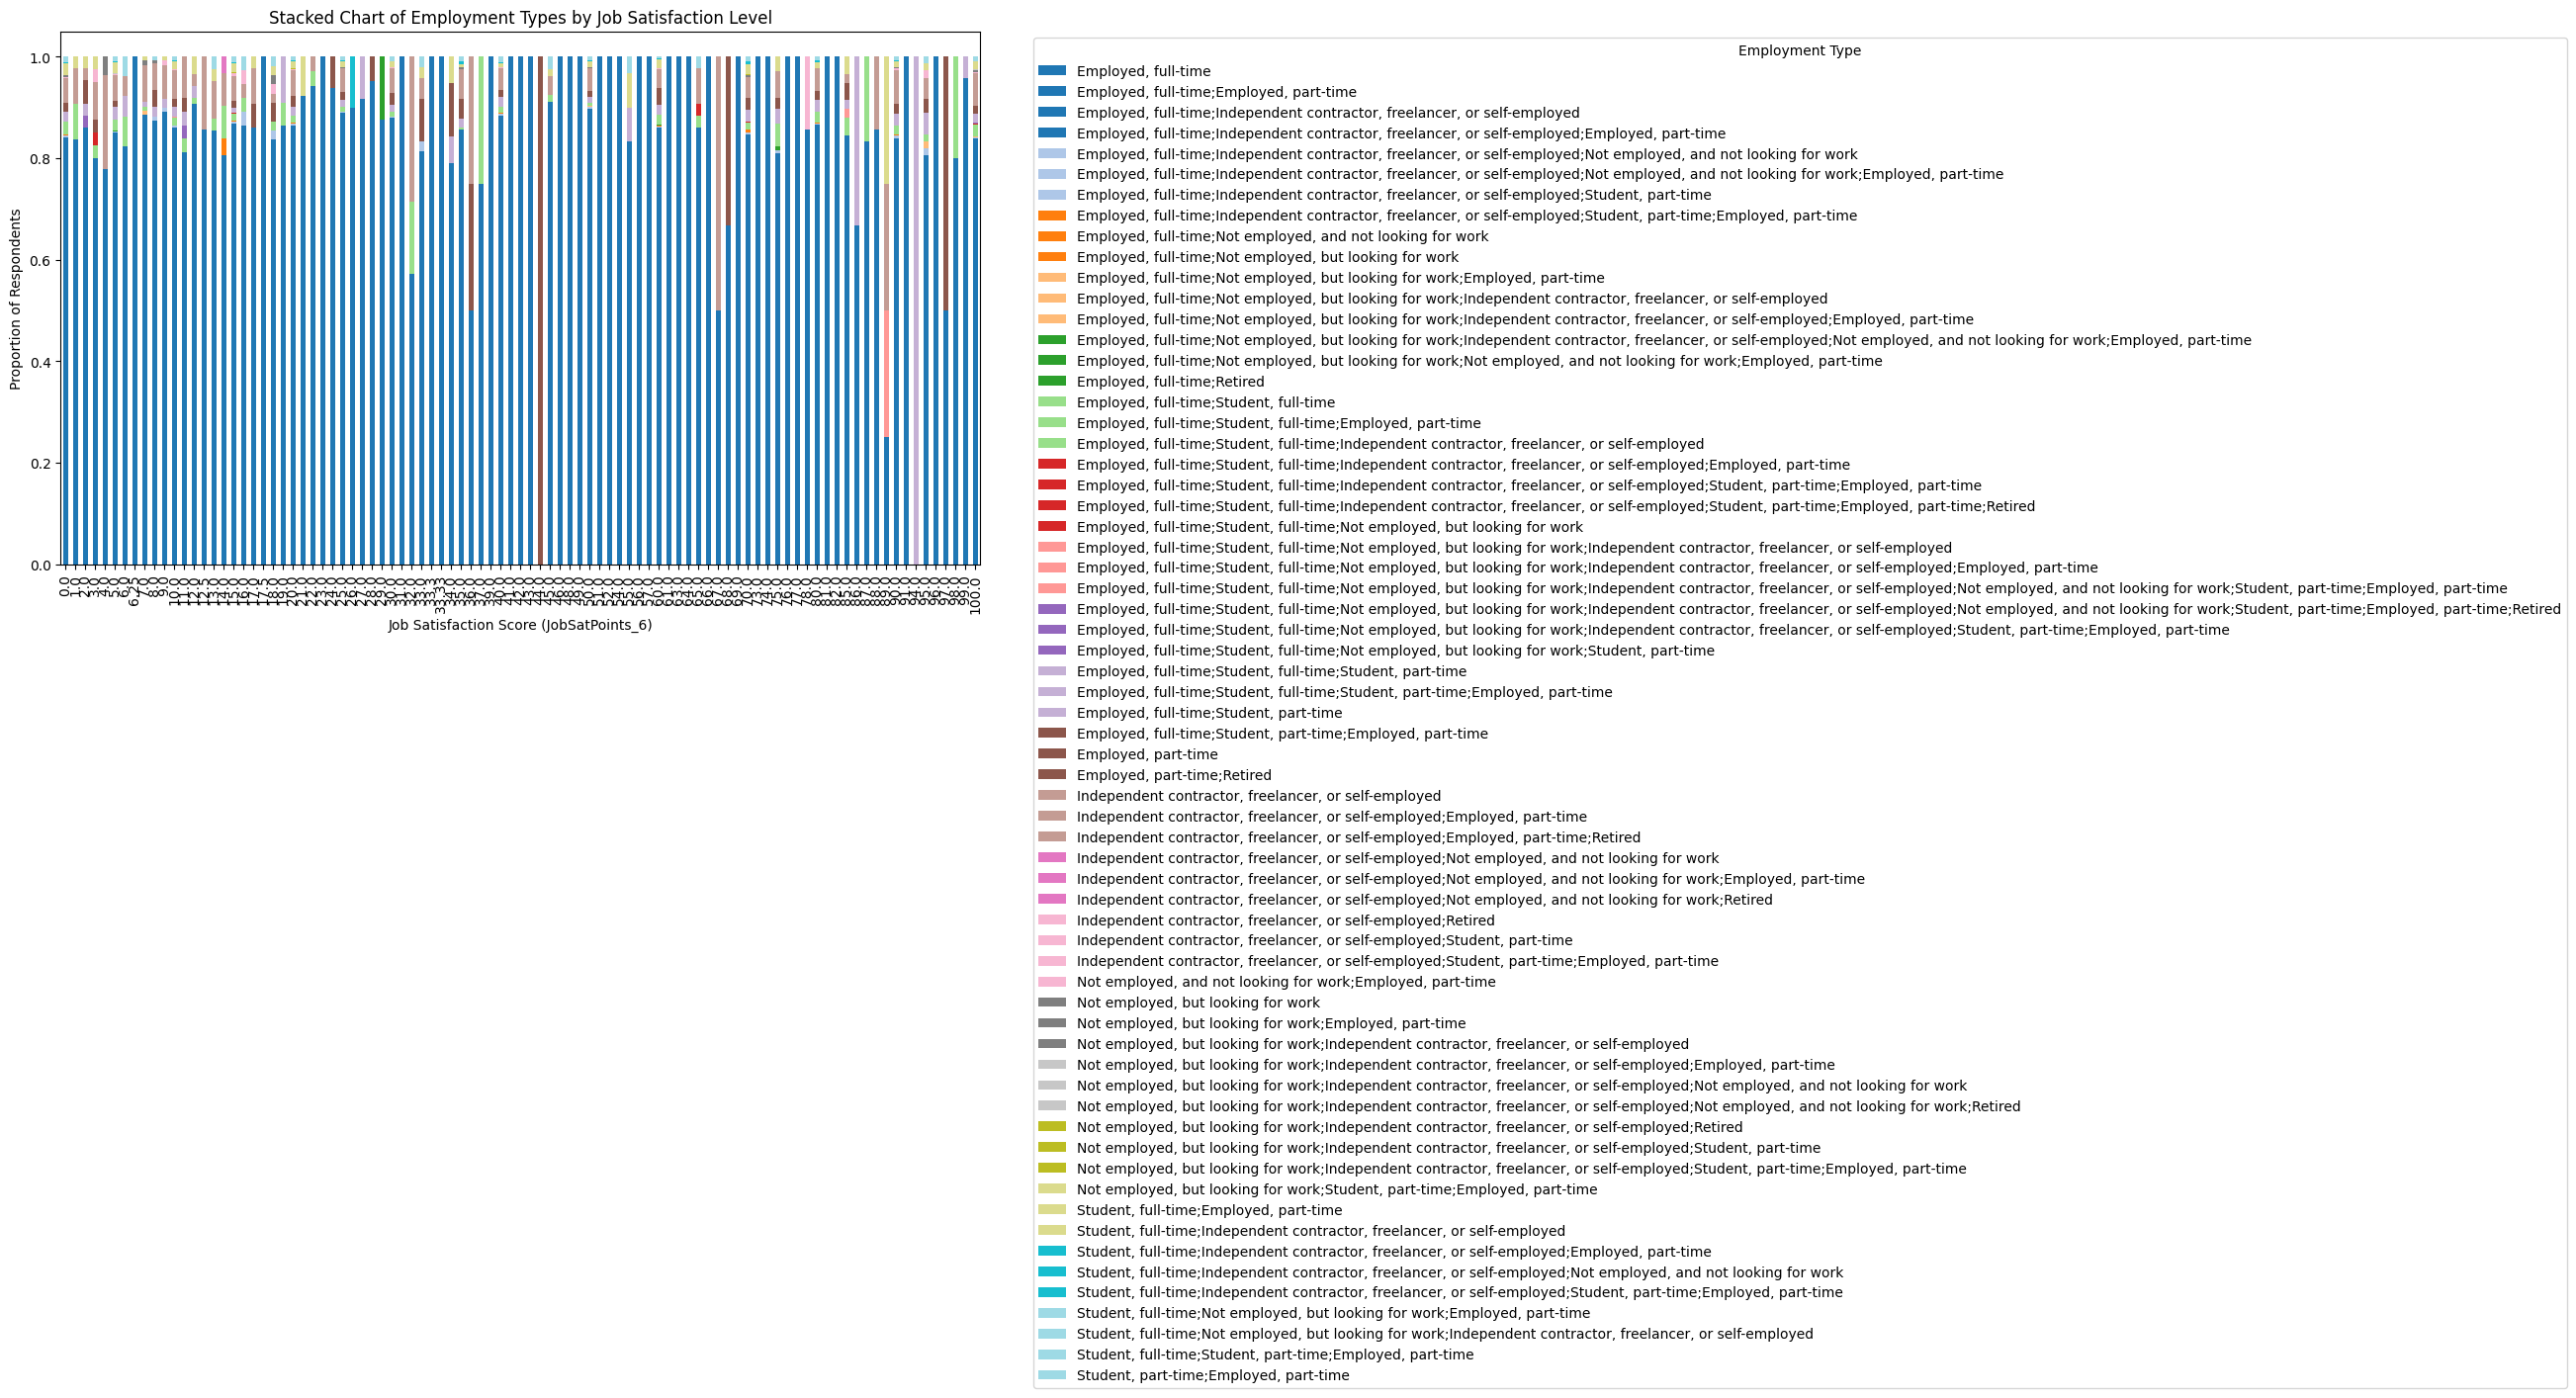

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Drop rows with missing values in Employment or JobSatPoints_6
df_filtered = df.dropna(subset=['Employment', 'JobSatPoints_6'])

# Step 2: Group by JobSatPoints_6 and Employment, count respondents
counts = df_filtered.groupby(['JobSatPoints_6', 'Employment']).size().reset_index(name='Count')

# Step 3: Pivot to have JobSatPoints_6 as index and Employment types as columns
pivot_df = counts.pivot(index='JobSatPoints_6', columns='Employment', values='Count').fillna(0)

# Step 4: Sort index if needed (optional)
pivot_df = pivot_df.sort_index()

# Step 5: Normalize per JobSatPoints_6 row to get proportions (optional)
pivot_norm = pivot_df.div(pivot_df.sum(axis=1), axis=0)

# Step 6: Plot stacked bar chart (raw counts or proportions, here using proportions)
pivot_norm.plot(kind='bar', stacked=True, figsize=(12,7), colormap='tab20')

plt.title('Stacked Chart of Employment Types by Job Satisfaction Level')
plt.xlabel('Job Satisfaction Score (JobSatPoints_6)')
plt.ylabel('Proportion of Respondents')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


/tmp/ipykernel_586/1701025709.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['LanguageAdmired'] = df_clean['LanguageAdmired'].str.split(';')
/tmp/ipykernel_586/1701025709.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df_exploded.groupby(['Age', 'LanguageAdmired']).size().reset_index(name='Count')


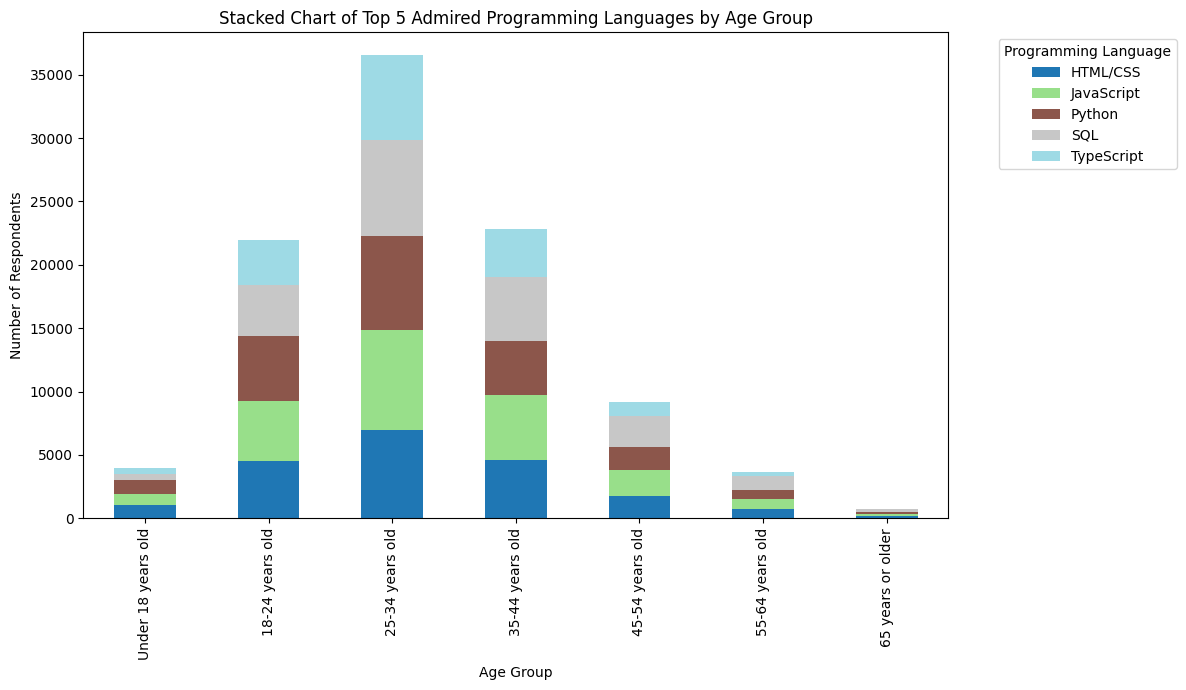

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Clean data - drop rows with missing values in LanguageAdmired or Age
df_clean = df.dropna(subset=['LanguageAdmired', 'Age'])

# Step 2: Explode LanguageAdmired so each language is a separate row
df_clean['LanguageAdmired'] = df_clean['LanguageAdmired'].str.split(';')
df_exploded = df_clean.explode('LanguageAdmired')

# Step 3: Strip spaces from language names
df_exploded['LanguageAdmired'] = df_exploded['LanguageAdmired'].str.strip()

# Step 4: Group by Age and LanguageAdmired, count respondents
counts = df_exploded.groupby(['Age', 'LanguageAdmired']).size().reset_index(name='Count')

# Step 5: Pick top N languages overall to reduce clutter (top 5 here)
top_languages = counts.groupby('LanguageAdmired')['Count'].sum().nlargest(5).index
counts_top = counts[counts['LanguageAdmired'].isin(top_languages)]

# Step 6: Pivot data for plotting (Age groups as index, languages as columns)
pivot_df = counts_top.pivot(index='Age', columns='LanguageAdmired', values='Count').fillna(0)

# Optional: Sort Age categories in logical order if needed
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old', 
             '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older']
pivot_df = pivot_df.reindex(age_order)

# Step 7: Plot stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20')

plt.title('Stacked Chart of Top 5 Admired Programming Languages by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.legend(title='Programming Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


/tmp/ipykernel_586/3736514674.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['PlatformAdmired'] = df_clean['PlatformAdmired'].str.split(';')
/tmp/ipykernel_586/3736514674.py:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


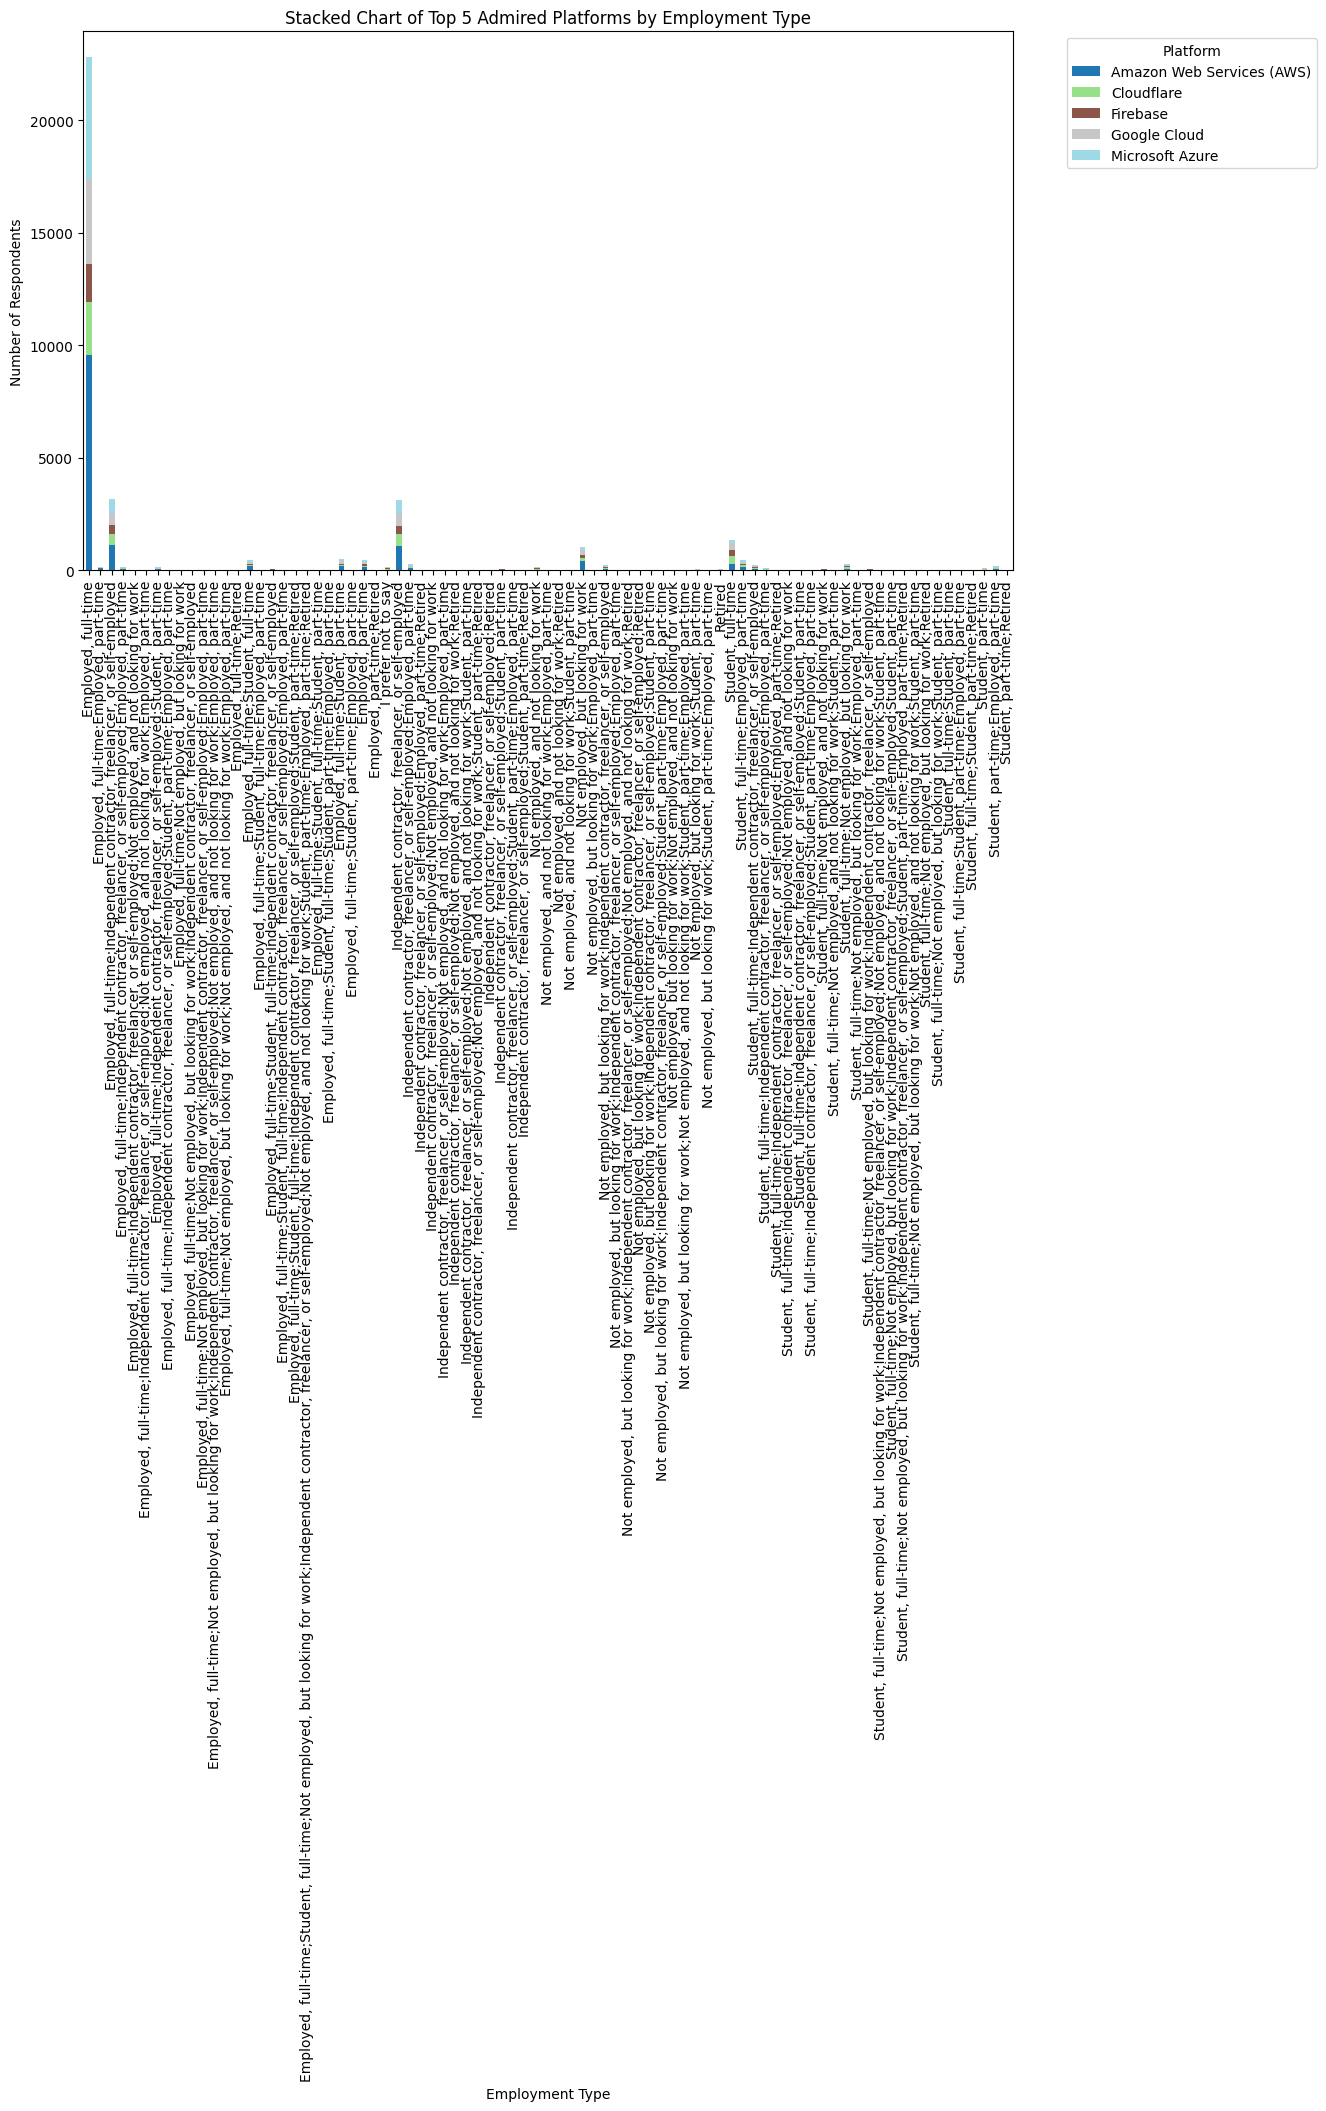

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Clean data - drop rows with missing PlatformAdmired or Employment
df_clean = df.dropna(subset=['PlatformAdmired', 'Employment'])

# Step 2: Explode PlatformAdmired so each platform is a separate row
df_clean['PlatformAdmired'] = df_clean['PlatformAdmired'].str.split(';')
df_exploded = df_clean.explode('PlatformAdmired')

# Step 3: Strip spaces from platform names
df_exploded['PlatformAdmired'] = df_exploded['PlatformAdmired'].str.strip()

# Step 4: Group by Employment and PlatformAdmired, count respondents
counts = df_exploded.groupby(['Employment', 'PlatformAdmired']).size().reset_index(name='Count')

# Step 5: Select top N platforms overall to reduce clutter (top 5 here)
top_platforms = counts.groupby('PlatformAdmired')['Count'].sum().nlargest(5).index
counts_top = counts[counts['PlatformAdmired'].isin(top_platforms)]

# Step 6: Pivot data for plotting (Employment as index, platforms as columns)
pivot_df = counts_top.pivot(index='Employment', columns='PlatformAdmired', values='Count').fillna(0)

# Optional: Sort employment types if needed
# pivot_df = pivot_df.reindex(['Employed, full-time', 'Employed, part-time', 'Freelance', 'Student, full-time', 'Other'])

# Step 7: Plot stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20')

plt.title('Stacked Chart of Top 5 Admired Platforms by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Number of Respondents')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
